In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Training
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn import datasets, metrics, model_selection, svm
import shap
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.model_selection import GridSearchCV

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df_bank = pd.read_csv(r'D:\Datensätze\Banking\german.data', sep=' ', header=None)

# Define the column names
original_column_names = [
    'Status of existing checking account',
    'Duration in month',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'Foreign worker',
    'Credit Risk'  # Adding the target variable
]

# Rename the columns
df_bank.columns = original_column_names

In [3]:
# Display the first few rows of the dataset
df_bank.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# 1. Understanding the data

- The dataset contains both categorical and numeric features
- Categorical: 'Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', and 'Foreign worker'
- Numerical: 'Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this bank', and 'Number of people being liable to provide maintenance for'
- Target Variable: 'Credit Risk'
  The target variable is a binary variable with 1 representing "Good" credit risk and "2" representing bad credit risk

In [4]:
# Checking for missing values

df_bank.isna().sum()

# -> Completely clean

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [5]:
# Checking the distribution of the target variable

target_dist = df_bank['Credit Risk'].value_counts(normalize = True)

target_dist

1    0.7
2    0.3
Name: Credit Risk, dtype: float64

The target variable seems to be imbalanced:

- 70% of the instances are labeled as "1" indicating a "Good" credit risk
- 30% of the instances are labeled as "2" indicating a "Bad" credit risk

-> The imbalance is something to keep in the mind as we move on with this notebook, as it could effect the performance of the machine learning algorithms

# 2. Exploratory Data Analysis (EDA)

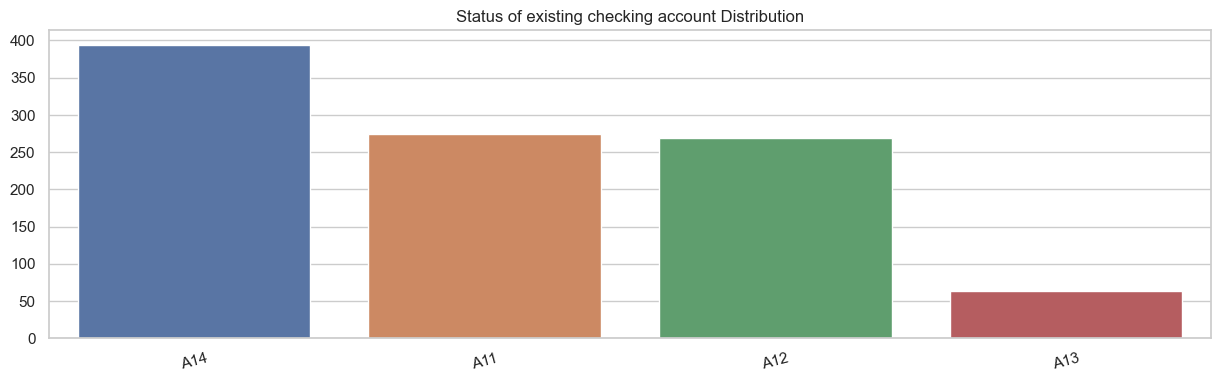

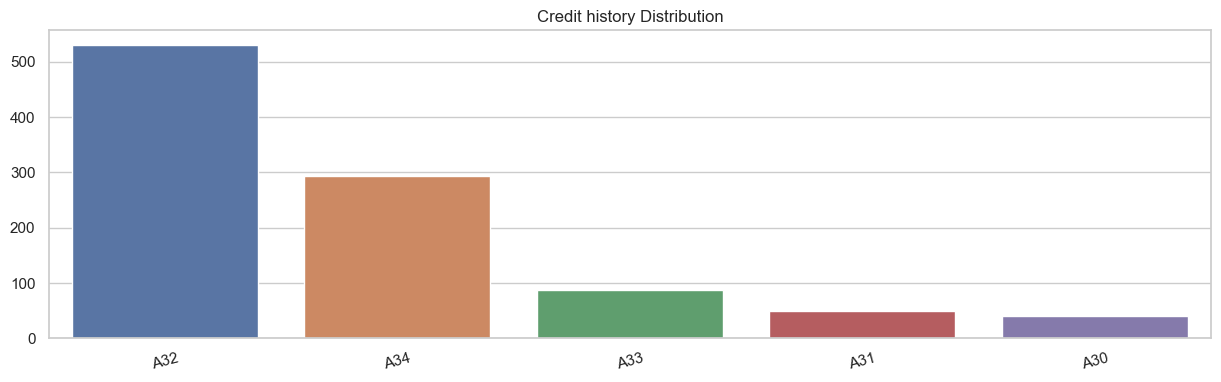

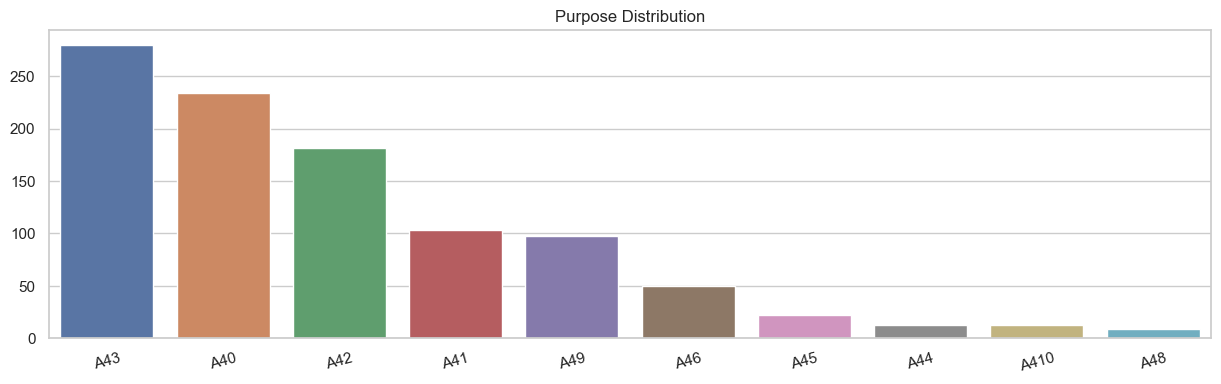

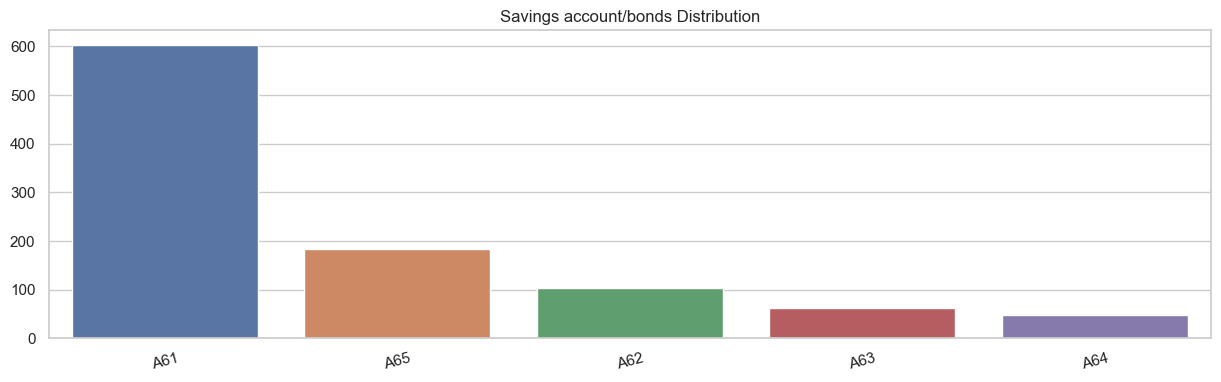

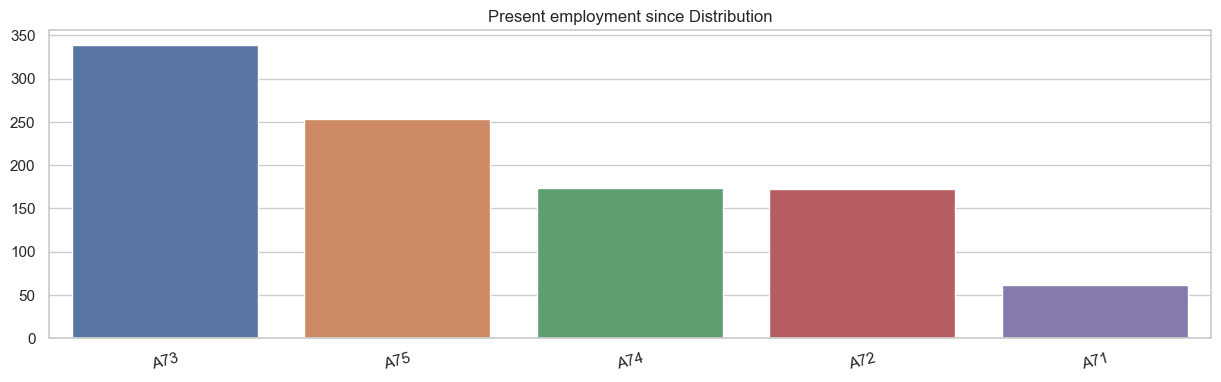

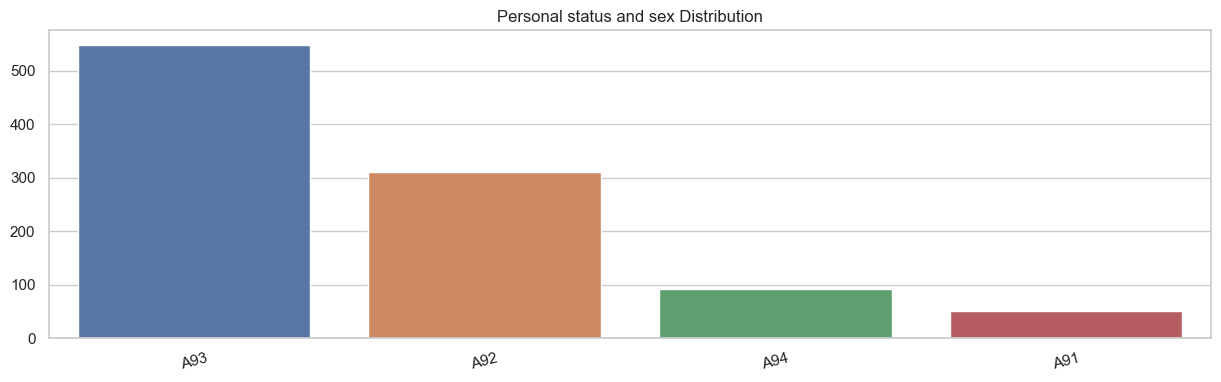

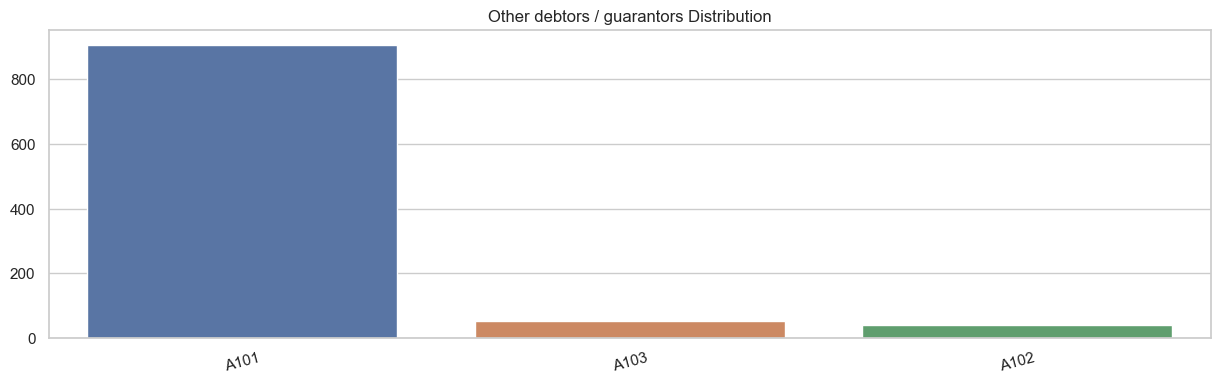

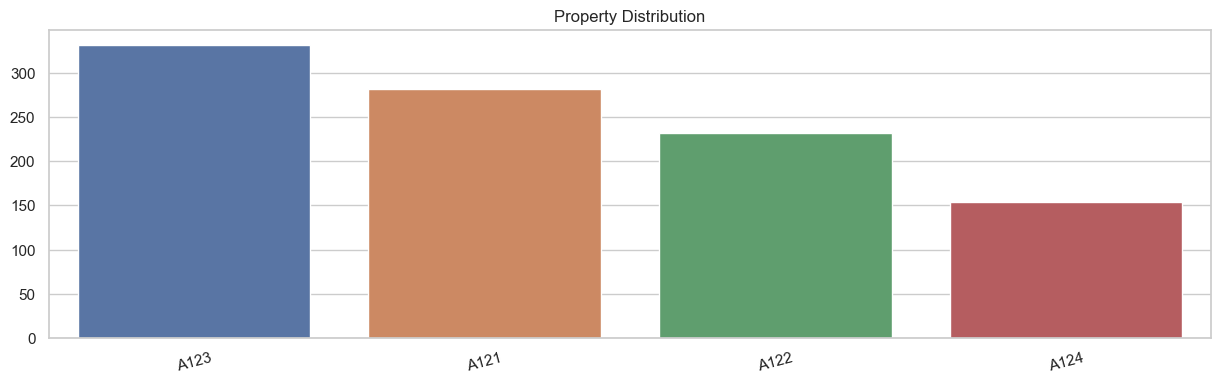

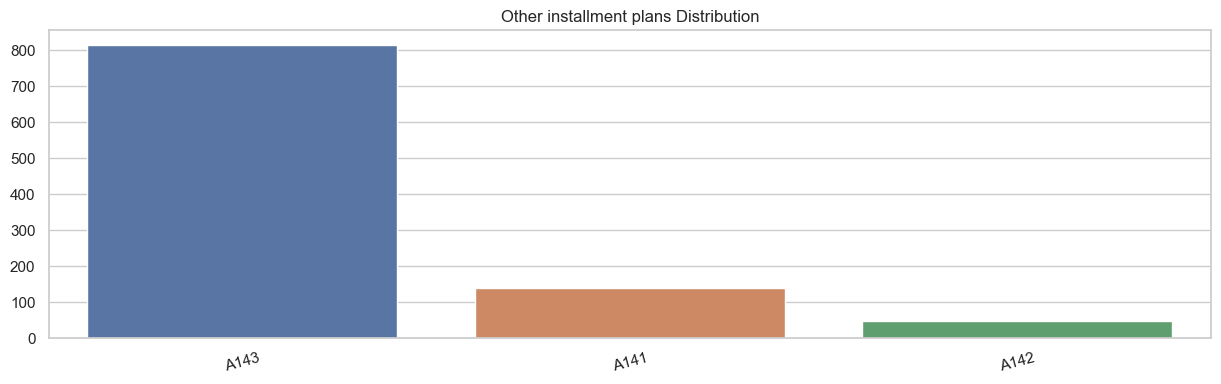

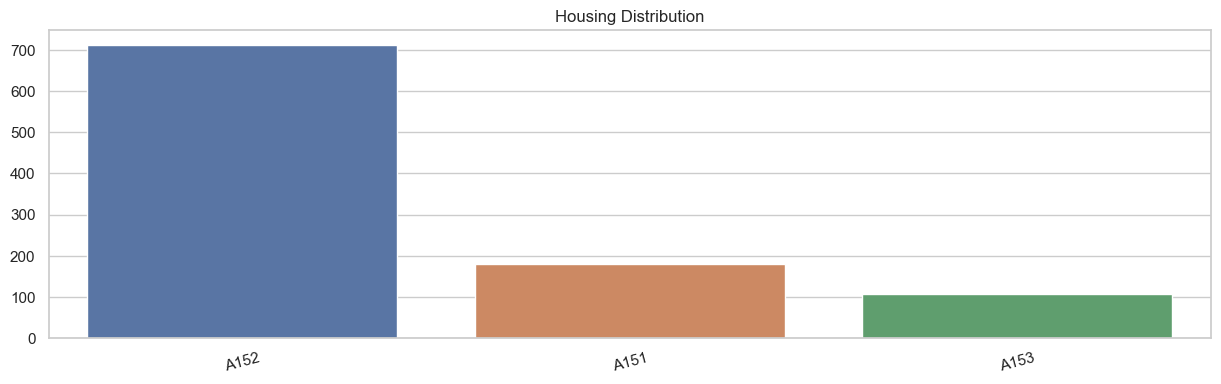

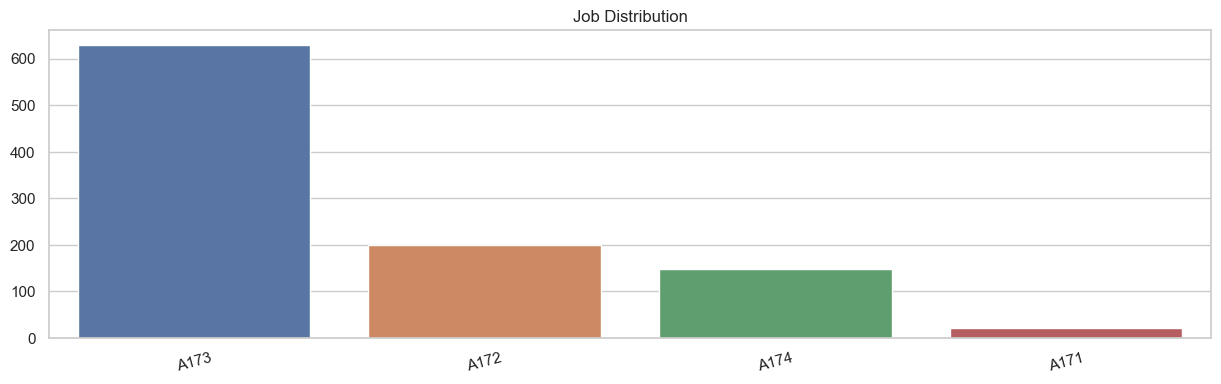

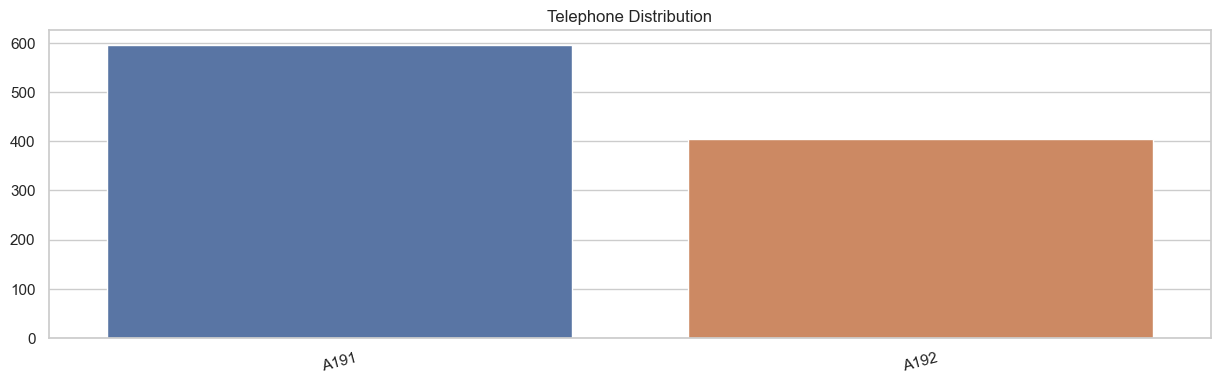

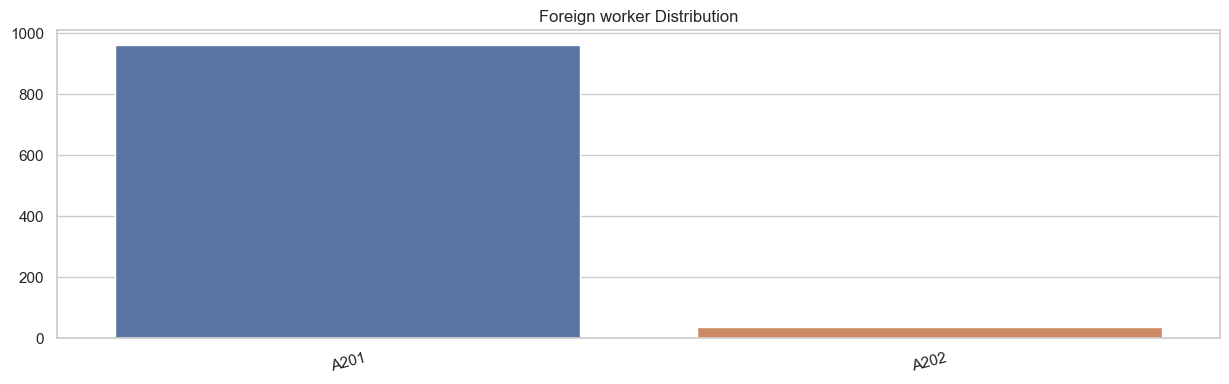

In [6]:
# Set the style of all seaborn graphs
sns.set(style="whitegrid")

# Let's first plot the distribution of all categorical variables
def plot_categorical(data, col, size=[8, 4], xlabel_angle=0, title=''):
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle != 0:
        plt.xticks(rotation=xlabel_angle)
    plt.show()

#Plotting categorical features
categorical_features = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                        'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 
                        'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

for feature in categorical_features:
    plot_categorical(df_bank, feature, size=[15, 4], xlabel_angle=15, title=feature+' Distribution')

### 'Status of existing checking account':
- Most of the individuals in the dataset do not have a checking account (A14).
- The next largest group is individuals with a checking account balance of less than 0 DM (A11), followed by those with a balance between 0 and 200 DM (A12).
- The smallest group is individuals with a balance of 200 DM or more or who have had salary assignments for at least 1 year (A13).

### 'Credit history':
- The largest group is individuals who have paid back all existing credits duly till now (A32).
- This is followed by those with a critical account or other existing credits not at this bank (A34), and those with no credits taken or all credits paid back duly (A30).
- The smallest groups are individuals who have all credits at this bank paid back duly (A31) and those who have had a delay in paying off in the past (A33).

### 'Purpose':
- The largest group is individuals who seek credit for radio/television (A43), followed by those who seek it for car (new) (A40) and furniture/equipment (A42).
- Other purposes like car (used) (A41), business (A49), and education (A46) are less common.

### 'Savings account/bonds':
- Most of the individuals have a savings account/bonds of less than 100 DM (A61).
- A significant number of individuals do not have a savings account/bonds or the account status is unknown (A65).
- The other categories (A62: 100 <= ... < 500 DM, A63: 500 <= ... < 1000 DM, A64: ... >= 1000 DM) make up smaller proportions of the dataset.

### 'Present employment since':
- The largest group of individuals have been employed for 1 to 4 years (A73), followed by those employed for 4 to 7 years (A74) or more than 7 years (A75).
- Fewer individuals have been employed for less than 1 year (A72) or are unemployed (A71).

### 'Personal status and sex':
- The largest group is single males (A93), followed by divorced/separated/married females (A92) and married/widowed males (A94).
- There are fewer divorced/separated males (A91) and single females (A95).

### 'Other debtors / guarantors':
- Most individuals do not have any other debtors or guarantors (A101).
- A small number of individuals have a co-applicant (A102) or a guarantor (A103).

### 'Property':
- The largest group is individuals who have a car or other property not mentioned in attribute 6 (A123), followed by those who have real estate (A121).
- Fewer individuals have a building society savings agreement/life insurance (A122) or have unknown/no property (A124).

### 'Other installment plans':
- Most individuals do not have any other installment plans (A143), while a smaller number have plans at a bank (A141) or stores (A142).

### 'Housing':
- Most individuals own their housing (A152), while fewer rent (A151) or live for free (A153).

### 'Job':
- The largest group is made up of skilled employees or officials (A173), followed by unskilled - resident (A172).
- Fewer individuals are management/self-employed/highly qualified employees/officers (A174) or unemployed/unskilled - non-resident (A171).

### 'Telephone':
- Most individuals do not have a telephone registered under their name (A191), while a smaller number do (A192).

### 'Foreign worker':
- Most individuals are foreign workers (A201), while fewer are not (A202).

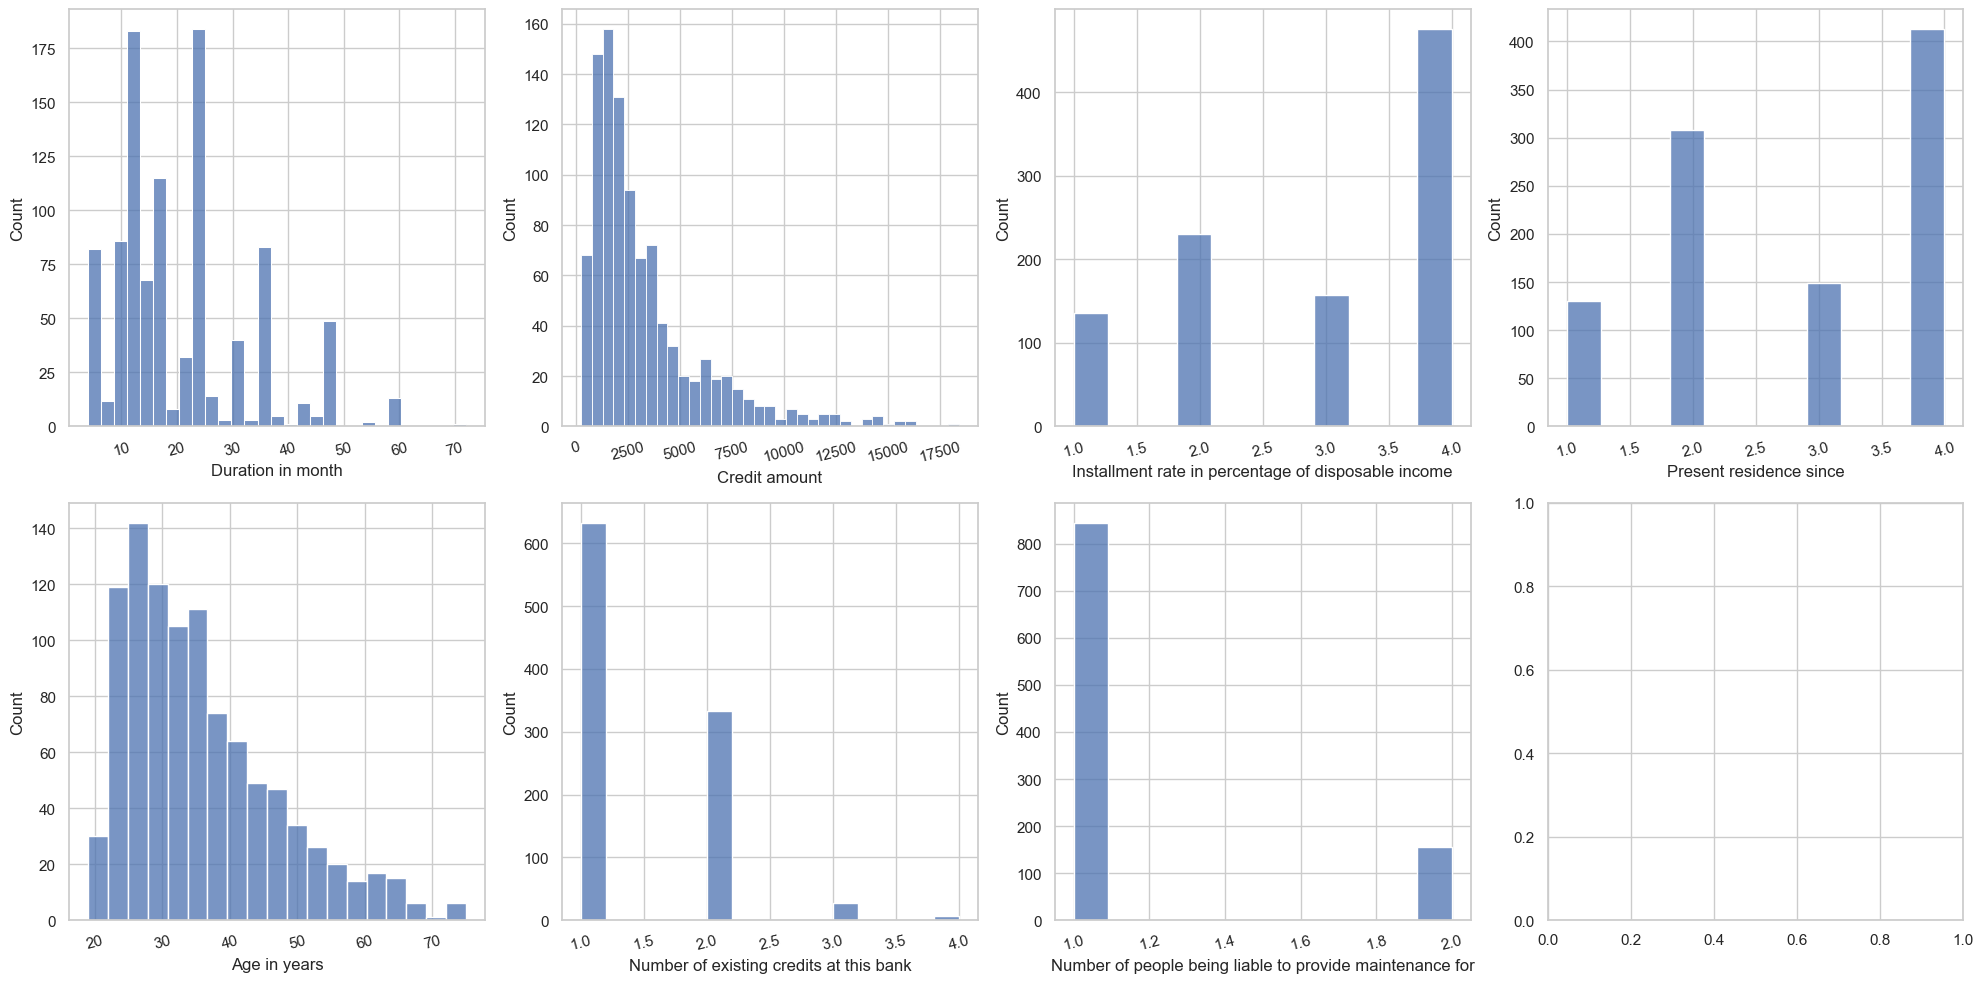

In [7]:
# Plotting numerical features
numerical_features = ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 
                      'Present residence since', 'Age in years', 'Number of existing credits at this bank', 
                      'Number of people being liable to provide maintenance for']

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.histplot(df_bank[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(15)
fig.tight_layout()

### 1. 'Duration in month':
- Most credit durations are less than 30 months, with a peak around 12 to 24 months.

### 3. 'Credit amount':
- Most credit amounts are less than 5000, with a peak around 1000 to 2000.

### 5. 'Installment rate in percentage of disposable income':
- The installment rates are fairly evenly distributed among 1 to 4.

### 7. 'Present residence since':
- Most individuals have been a resident for 2 to 4 years.

### 9. 'Age in years':
- The ages are fairly evenly distributed among 20 to 70 years old, with a peak around 25 to 35 years old.

### 11. 'Number of existing credits at this bank':
- Most individuals have 1 to 2 existing credits at this bank.

### 13. 'Number of people being liable to provide maintenance for':
- Most individuals are not liable to provide maintenance for anyone else.

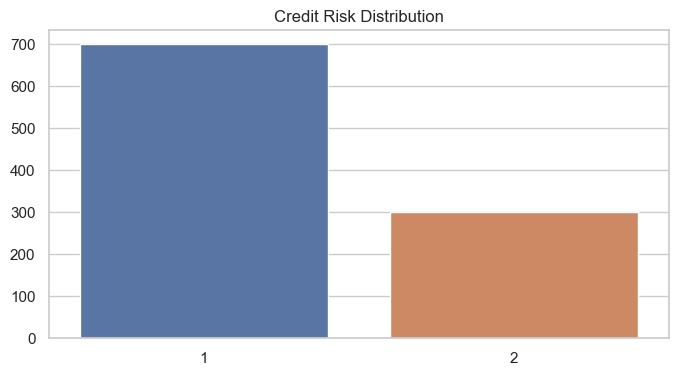

In [8]:
# Plotting the target variable
plot_categorical(df_bank, 'Credit Risk', size=[8, 4], title='Credit Risk Distribution')

### 'Credit Risk': 
- 70% of the individuals are labeled as 'Good' credit risk ('1'), and 30% are labeled as 'Bad' credit risk ('2').

# 3. Correlation Analysis

In [9]:
# Before starting the correlation analysis we have to create a correlation temp. dataframe

numerical_df = df_bank.copy()

le = LabelEncoder()
for col in numerical_df.columns:
    if numerical_df[col].dtype=='object':
        numerical_df[col] =  le.fit_transform(numerical_df[col])

In [10]:
# Calculate the correlations
correlations = numerical_df.corr()

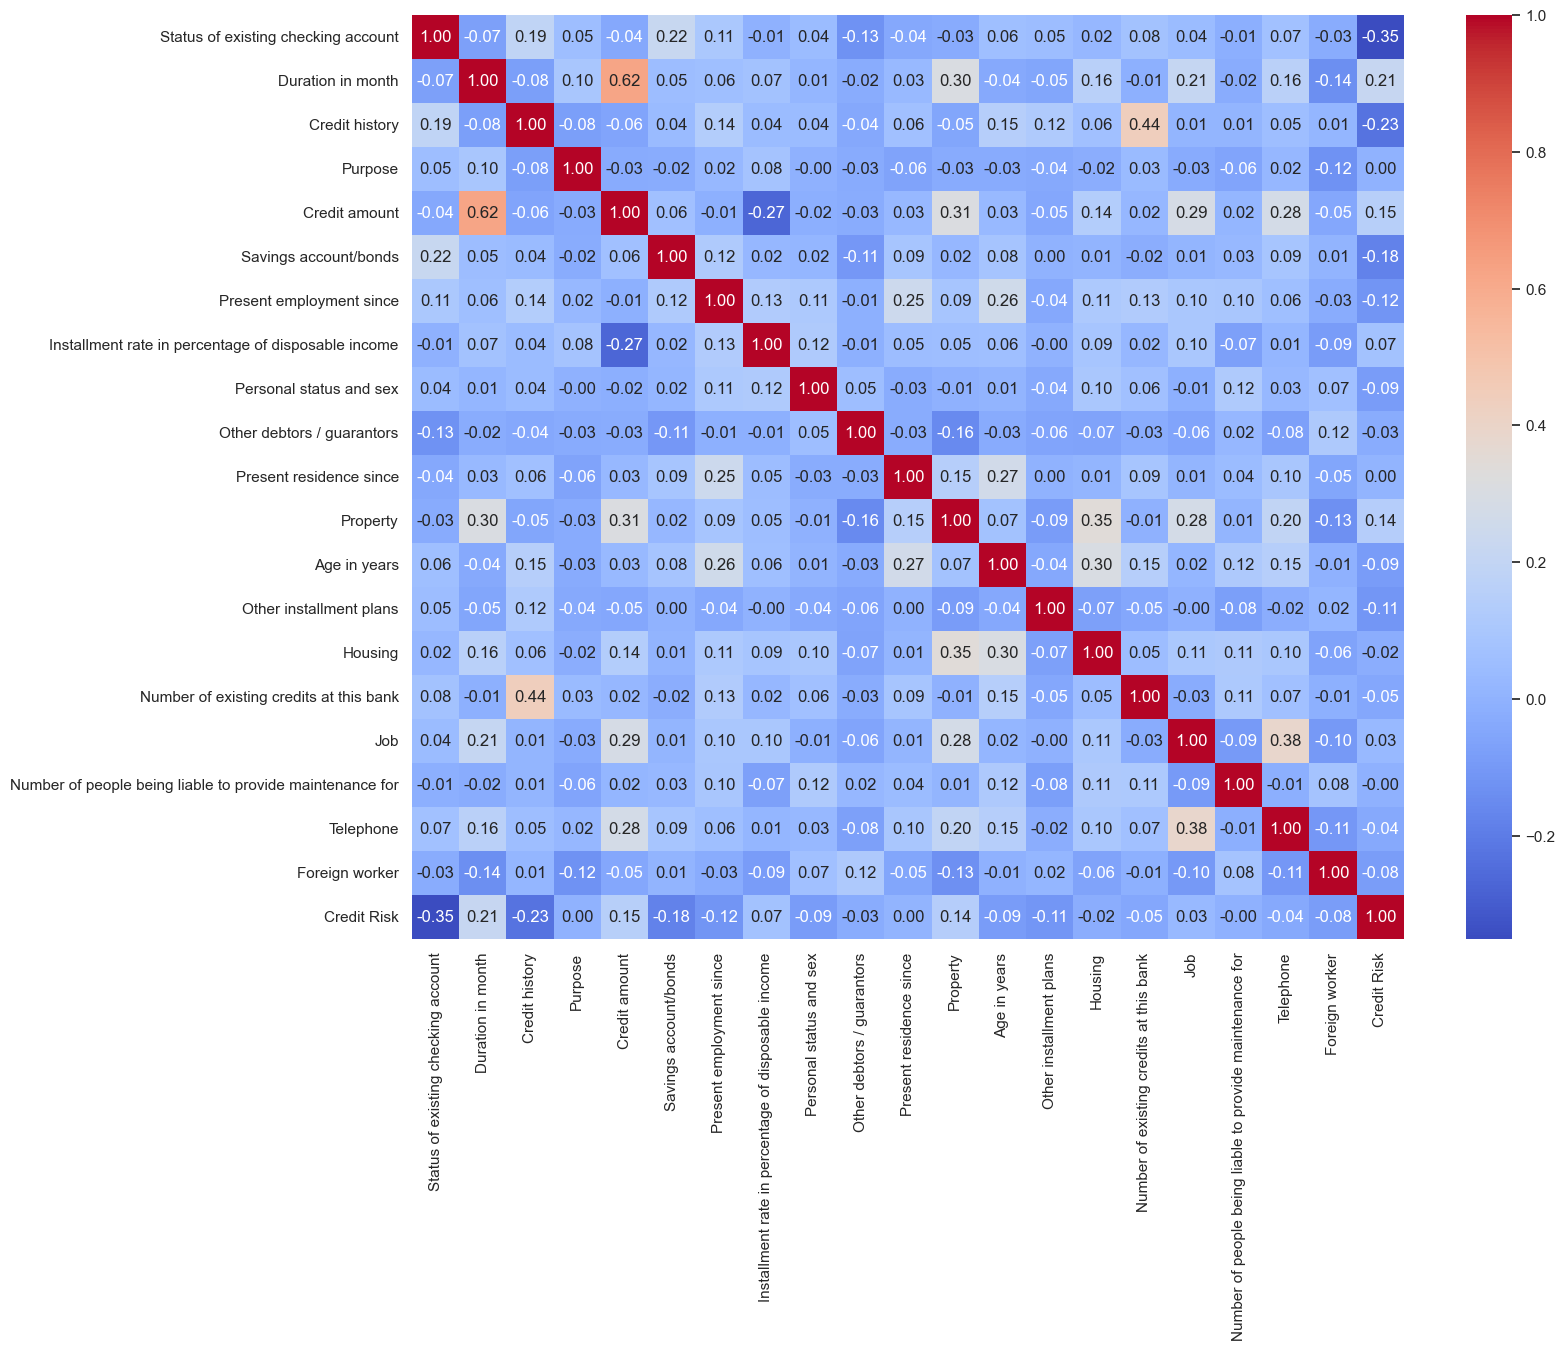

In [11]:
# Visualization of the correlation results

# Figura size
plt.figure(figsize=(16, 12))

# Heatmap display
sns.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f")

plt.show()

## Insights in the correlation analysis

### 1. 'Status of existing checking account' and 'Duration in month':
- The correlation is 0.09, which is quite low. This suggests that there is no strong linear relationship between these two features.

### 2. 'Status of existing checking account' and 'Credit amount':
- The correlation is 0.02, which is very low, indicating no significant linear relationship between these two features.

### 3. 'Duration in month' and 'Credit amount':
- The correlation is 0.62, which is relatively high. This suggests that there is a strong positive linear relationship between the duration of the loan and the amount of the loan.

### 4. 'Installment rate in percentage of disposable income' and 'Present residence since':
- The correlation is 0.05, which is quite low, indicating no significant linear relationship.

### 5. 'Age in years' and 'Number of existing credits at this bank':
- The correlation is 0.15, which is relatively low, suggesting no significant linear relationship.


## Insight 

### 1. 'Status of existing checking account' and 'Credit Risk': 
- The correlation is -0.35. This is the highest (absolute) correlation we see with the target variable.
- It suggests that the status of a client's existing checking account has a significant influence on their credit risk, with a higher status (more money in the account) being associated with lower credit risk.

### 2. 'Duration in month' and 'Credit Risk': 
- The correlation is 0.21. This suggests that loan duration has a positive influence on credit risk, with longer durations associated with higher credit risk.

### 3. 'Credit amount' and 'Credit Risk':
- The correlation is 0.15, indicating that higher loan amounts are associated with higher credit risk.

### 4. 'Installment rate in percentage of disposable income' and 'Credit Risk': 
- The correlation is 0.07, which is quite low, indicating that this feature may not have a strong influence on credit risk.

### 5. 'Age in years' and 'Credit Risk': 
- The correlation is -0.09. This suggests that older clients tend to have slightly lower credit risk.

# Pairplot Analysis for the highest correlating pairs in the dataframe

- A pairplot shows us the relationship between two attributes 

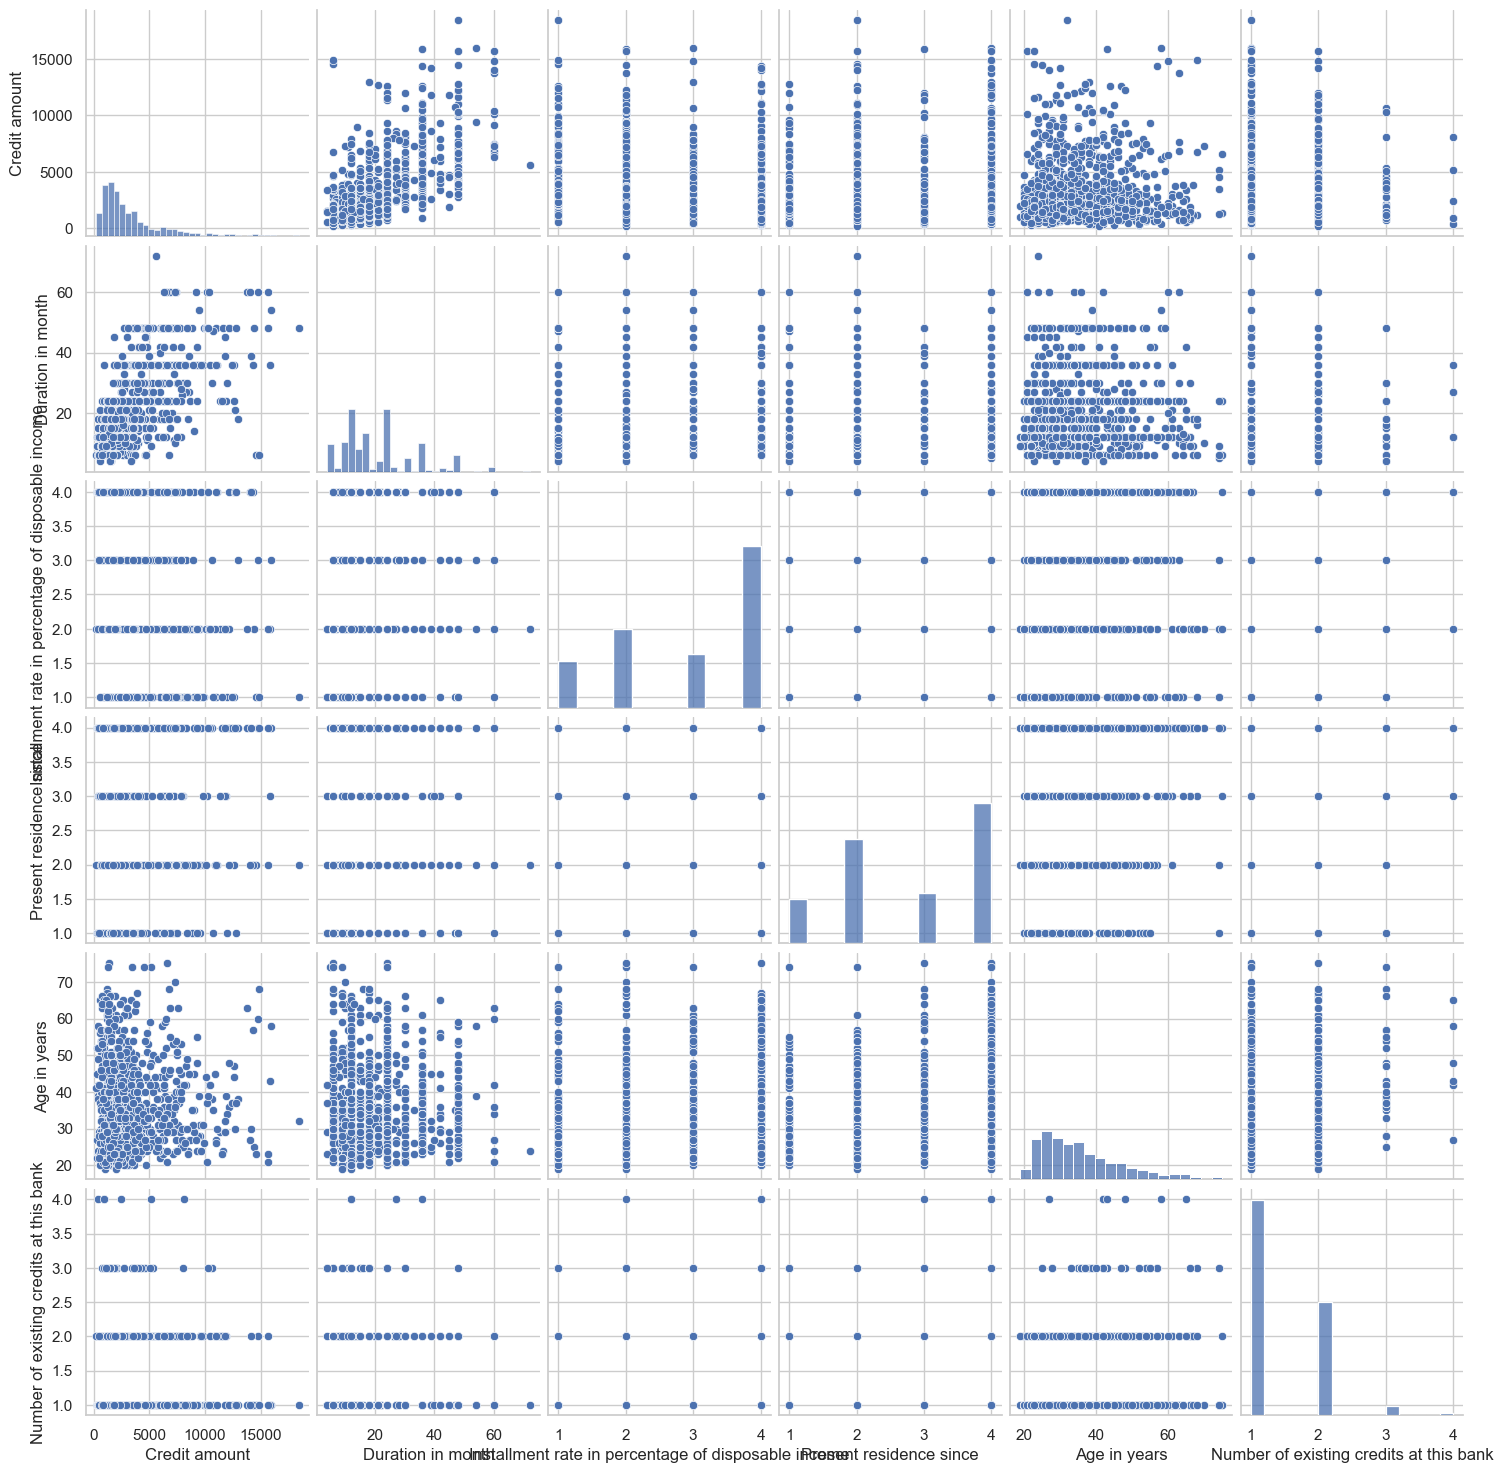

In [12]:
# Define the pairs for pairplot
pairplot_features = ['Credit amount', 'Duration in month', 
                     'Installment rate in percentage of disposable income', 
                     'Present residence since', 'Age in years', 
                     'Number of existing credits at this bank']

# Create pairplots for these pairs
sns.pairplot(numerical_df[pairplot_features])
plt.show()

## Pairplots with the two target variables seperated

- Additional information into how the attributes differ betwen low and high credit risk

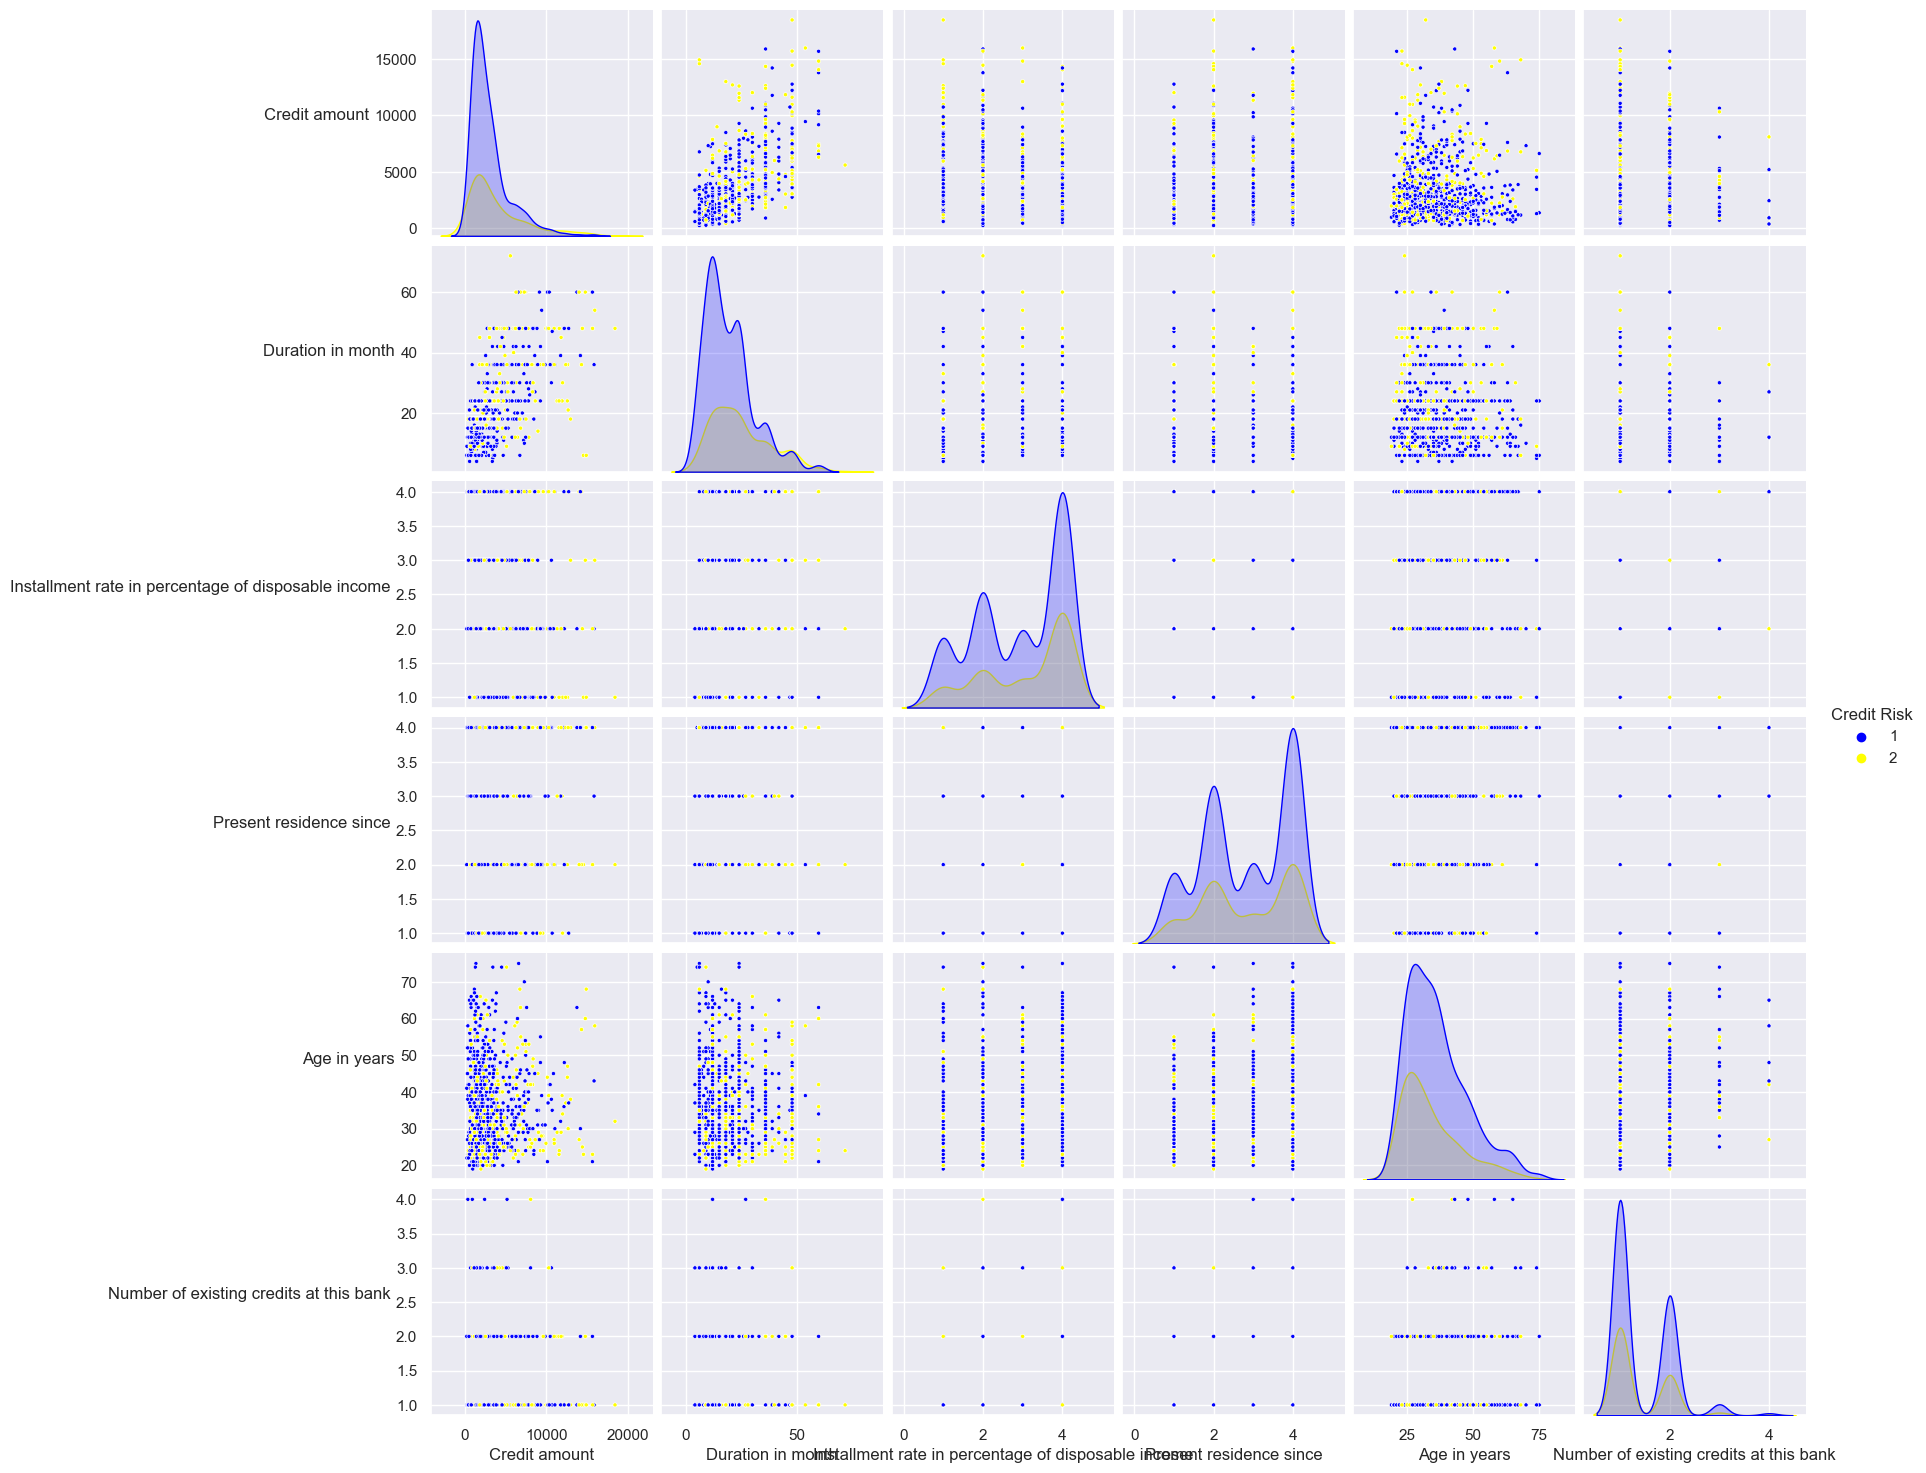

In [13]:
# Adjust the size of the plot
sns.set(rc={"figure.figsize":(10, 10)})

# Create pairplot with better color theme, rotated labels and point marker
pairplot = sns.pairplot(numerical_df[pairplot_features + ['Credit Risk']], hue='Credit Risk', palette=['blue', 'yellow'], markers='.')

# Rotate the variable names on the y-axis to avoid overlap
for ax in pairplot.axes.flatten():
    # Rotate y-axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    # Set y-axis labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()

## Pairplot-Analysis Results:

### 1. 'Credit amount' and 'Duration in month': 
- The scatterplot shows a clear positive correlation. With the differentiation by 'Credit Risk', it's more apparent that higher credit amounts and longer durations are associated more with 'Credit Risk' category 2 (yellow) than category 1 (blue).
- This suggests that higher credit amounts and longer durations are likely to be riskier.

### 2. 'Present residence since' and 'Age in years': 
- The scatterplot shows a somewhat positive relationship, but it's not very strong.
- When differentiated by 'Credit Risk', there's no clear pattern, suggesting that the relationship between these variables and 'Credit Risk' may not be straightforward.

### 3. 'Age in years' and 'Number of existing credits at this bank': 
- There's no clear linear relationship. When differentiated by 'Credit Risk', there's no clear pattern, suggesting that the relationship between these variables and 'Credit Risk' may not be straightforward.

# 4. Feature Engineering

In [14]:
# Adding an interesting feature named 'Credit to Duration Ratio', which further shows captures the relationship between 'Credit Amount' and 'Duration in month'

numerical_df['Credit to Duration Ratio'] = numerical_df['Credit amount'] / numerical_df['Duration in month']

In [15]:
# One-Hot Encoding
categorical_features = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                        'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 
                        'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']
df_encoded = pd.get_dummies(numerical_df, columns=categorical_features, drop_first=True)

# Display the DataFrame after feature engineering
df_encoded.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit Risk,Credit to Duration Ratio,Status of existing checking account_1,...,Property_3,Other installment plans_1,Other installment plans_2,Housing_1,Housing_2,Job_1,Job_2,Job_3,Telephone_1,Foreign worker_1
0,6,1169,4,4,67,2,1,1,194.833333,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,123.979167,1,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,174.666667,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,187.666667,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,202.916667,0,...,1,0,1,0,1,0,1,0,0,0


## Detecting and handling outliers using IQR (Interquartile Range)

- Define a whisker that extends 1.5 * IQR from the Q1 and Q3 (1st quartile - 25th percentile, and 3rd quartile-75th percentile, respectively)
- Any data points above or below the shiwskers is treated as an outlier

Formula for the lower and upper whisker:

- Lower Whisker = Q1 - 1.5*IQR
- Upper Whisker = Q3 + 1.5*IQR

In [16]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = []
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25)
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            
            outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]})
            
    return pd.DataFrame(outliers)



detect_outliers(df_encoded)

,Feature,Number of Outliers
0,Duration in month,70
1,Credit amount,72
2,Installment rate in percentage of disposable i...,0
3,Present residence since,0
4,Age in years,23
5,Number of existing credits at this bank,6
6,Number of people being liable to provide maint...,155
7,Credit Risk,0
8,Credit to Duration Ratio,45
9,Status of existing checking account_1,0


## Result:

- Several features have a significant number of outliers.
- Some categorical variables also have many values that are considered outliers because they have fewer instances.
  
- -> Given the nature of this dataset (credit scoring), these outliers might represent important but rare events.
- -> For example, it's not uncommon to have customers who have very high credit amounts or long durations.
- -> These cases are unusual, but they're important for the model to learn from. Therefore, we might want to keep these outliers.


## Scaling 

In [17]:
# Apply feature scaling to the numerical features
scaler = StandardScaler()

df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numerical_features] = scaler.fit_transform(df_encoded_scaled[numerical_features])

# Display the DataFrame after feature scaling
df_encoded_scaled.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit Risk,Credit to Duration Ratio,Status of existing checking account_1,...,Property_3,Other installment plans_1,Other installment plans_2,Housing_1,Housing_2,Job_1,Job_2,Job_3,Telephone_1,Foreign worker_1
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,194.833333,0,...,0,0,1,1,0,0,1,0,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,2,123.979167,1,...,0,0,1,1,0,0,1,0,0,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,174.666667,0,...,0,0,1,1,0,1,0,0,0,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,187.666667,0,...,0,0,1,0,1,0,1,0,0,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,2,202.916667,0,...,1,0,1,0,1,0,1,0,0,0


## Result:

- df_encoded: This dataset has not had feature scaling applied. It's suitable for models like Linear Regression, Decision Trees, and Random Forests.

- df_encoded_scaled: This dataset has had standardization applied to the numerical features. It's suitable for models like k-Nearest Neighbors (k-NN), Support Vector Machines (SVM), and Neural Networks.



# Model Selection and Training

In [18]:
# We need to convert the target variable 'Credit Risk' to numerical before model building
le = LabelEncoder()
df_encoded['Credit Risk'] = le.fit_transform(df_encoded['Credit Risk'])

# Split the data into a training set and a test set
X = df_encoded.drop('Credit Risk', axis=1)
y = df_encoded['Credit Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

In [19]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.795
Precision: 0.6956521739130435
Recall: 0.5423728813559322
F1 Score: 0.6095238095238096
ROC AUC Score: 0.721541050607044

Confusion Matrix:
[[127  14]
 [ 27  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       141
           1       0.70      0.54      0.61        59

    accuracy                           0.80       200
   macro avg       0.76      0.72      0.74       200
weighted avg       0.79      0.80      0.79       200



## Evaluation Result for the Logistic Regression Model:

- Accuracy: The model is failry good at making correct predictions
- Precision: Also fairly good, but some room for improvements
- Recall: Not very good, improvement needed
- F1 Score Room for improvement
- ROC AUC: better distiguishing between the classes than at random but needs room for improvement

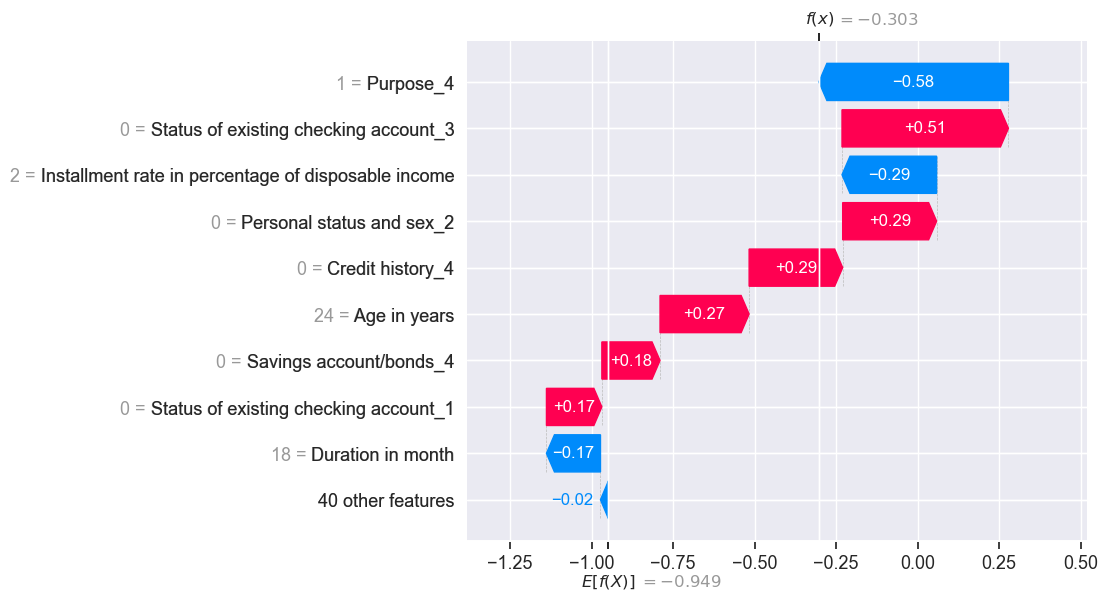

In [20]:
# Create an explainer and compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP values for the first instance in the test set
shap.plots.waterfall(shap_values[0])

## Support Vector Machine (SVM)

In [21]:
# Train a Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

# Calculate metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)

# Print the metrics
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")
print(f"ROC AUC Score: {roc_auc_svc}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.715
Precision: 0.75
Recall: 0.05084745762711865
F1 Score: 0.09523809523809525
ROC AUC Score: 0.5218776295227792

Confusion Matrix:
[[140   1]
 [ 56   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       141
           1       0.75      0.05      0.10        59

    accuracy                           0.71       200
   macro avg       0.73      0.52      0.46       200
weighted avg       0.72      0.71      0.61       200



## Result:
- The SVM is not performing well on this dataset. It is not effectively identifying the credit risks. 

## Random Forest

In [22]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rfc)

# Print the metrics
print(f"Accuracy: {accuracy_rfc}")
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_rfc}")
print(f"ROC AUC Score: {roc_auc_rfc}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfc))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))

Accuracy: 0.77
Precision: 0.6857142857142857
Recall: 0.4067796610169492
F1 Score: 0.5106382978723405
ROC AUC Score: 0.664382738309893

Confusion Matrix:
[[130  11]
 [ 35  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       141
           1       0.69      0.41      0.51        59

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



### Result:
- While performing better than the last model the performance is still lacking

# Gradient Boosting

In [23]:
# Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc.predict(X_test)

# Calculate metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)

# Print the metrics
print(f"Accuracy: {accuracy_gbc}")
print(f"Precision: {precision_gbc}")
print(f"Recall: {recall_gbc}")
print(f"F1 Score: {f1_gbc}")
print(f"ROC AUC Score: {roc_auc_gbc}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))

Accuracy: 0.82
Precision: 0.8108108108108109
Recall: 0.5084745762711864
F1 Score: 0.6249999999999999
ROC AUC Score: 0.7294145931001322

Confusion Matrix:
[[134   7]
 [ 29  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       141
           1       0.81      0.51      0.62        59

    accuracy                           0.82       200
   macro avg       0.82      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200



### Result:
- Similar result than the random forest but with a better balance between precision and recall

# XGBoost

In [24]:
# Train an XGBoost Classifier
xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgbc = xgbc.predict(X_test)

# Calculate metrics
accuracy_xgbc = accuracy_score(y_test, y_pred_xgbc)
precision_xgbc = precision_score(y_test, y_pred_xgbc)
recall_xgbc = recall_score(y_test, y_pred_xgbc)
f1_xgbc = f1_score(y_test, y_pred_xgbc)
roc_auc_xgbc = roc_auc_score(y_test, y_pred_xgbc)

# Print the metrics
print(f"Accuracy: {accuracy_xgbc}")
print(f"Precision: {precision_xgbc}")
print(f"Recall: {recall_xgbc}")
print(f"F1 Score: {f1_xgbc}")
print(f"ROC AUC Score: {roc_auc_xgbc}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgbc))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgbc))

Accuracy: 0.76
Precision: 0.627906976744186
Recall: 0.4576271186440678
F1 Score: 0.5294117647058824
ROC AUC Score: 0.6720759706695517

Confusion Matrix:
[[125  16]
 [ 32  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       141
           1       0.63      0.46      0.53        59

    accuracy                           0.76       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.75      0.76      0.75       200



`use_label_encoder` is deprecated in 1.7.0.


### Result:
- Given these results, it seems that the XGBoost Classifier model is performing worse than both the Random Forest and Gradient Boosting models on this dataset.

# Naive Bayes

In [25]:
# Train a Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

# Calculate metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)

# Print the metrics
print(f"Accuracy: {accuracy_gnb}")
print(f"Precision: {precision_gnb}")
print(f"Recall: {recall_gnb}")
print(f"F1 Score: {f1_gnb}")
print(f"ROC AUC Score: {roc_auc_gnb}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

Accuracy: 0.725
Precision: 0.5303030303030303
Recall: 0.5932203389830508
F1 Score: 0.5599999999999999
ROC AUC Score: 0.6866810914773411

Confusion Matrix:
[[110  31]
 [ 24  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       141
           1       0.53      0.59      0.56        59

    accuracy                           0.73       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.74      0.72      0.73       200



## Result:
- Not performing well

# SMOTE (Synthetic Minority Over-sampling Technique)

- SMOTE first selects a minority class instance 'a' at random and finds its 'k' nearest minority class neighbors.
-  The synthetic instance is then created by choosing one of the 'k' nearest neighbors 'b' at random and connecting 'a' and 'b' to form a line segment in the feature space.
-  The synthetic instances are generated as a convex combination of the two chosen instances 'a' and 'b'.

-  The idea is to create 'synthetic' examples rather than just duplicating instances of the minority class.
-  SMOTE takes the whole feature space into consideration and generates new instances anywhere on the lines joining any/all of the k minority class nearest neighbors.

- -> By doing so, SMOTE helps to increase the number of minority class instances in the dataset, thus overcoming the class imbalance issue to some extent.

In [26]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [27]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_sm, y_train_sm)

    # Make predictions
    y_pred_sm = model.predict(X_test_sm)

    # Print the metrics
    print(f"Model: {model_name}")
    print('Accuracy:', accuracy_score(y_test_sm, y_pred_sm))
    print('Precision:', precision_score(y_test_sm, y_pred_sm))
    print('Recall:', recall_score(y_test_sm, y_pred_sm))
    print('F1 Score:', f1_score(y_test_sm, y_pred_sm))
    print()

Model: Logistic Regression
Accuracy: 0.8071428571428572
Precision: 0.7692307692307693
Recall: 0.8396946564885496
F1 Score: 0.8029197080291971

Model: Random Forest
Accuracy: 0.8357142857142857
Precision: 0.84
Recall: 0.8015267175572519
F1 Score: 0.8203125



## Conclusion

- Using SMOTe has SIGNIFICANTLY improved the performence of both models
- Especially Recall and the F1 Score 

# Using a Neuronal Network

In [28]:
# Concatenate the X and y dataframes to create a complete dataframe
df_smote = pd.concat([X_sm, y_sm], axis=1)

In [29]:
# Split the dataset into features (X) and the target (y)
X = df_smote.drop('Credit Risk', axis=1)
y = df_smote['Credit Risk']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Define metrics
metrics = [
    'accuracy',
    AUC(name='auc'),
    Precision(name='precision'),
    Recall(name='recall'),
]

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=metrics)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
results = model.evaluate(X_test, y_test)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

Epoch 1/5
18/18 [==============================] - 1s 17ms/step - loss: 107.4730 - accuracy: 0.5250 - auc: 0.5139 - precision: 0.5307 - recall: 0.5624 - val_loss: 74.7418 - val_accuracy: 0.4679 - val_auc: 0.5286 - val_precision: 0.4679 - val_recall: 1.0000
Epoch 2/5
18/18 [==============================] - 0s 4ms/step - loss: 66.6337 - accuracy: 0.5312 - auc: 0.5161 - precision: 0.5355 - recall: 0.5835 - val_loss: 55.5037 - val_accuracy: 0.5321 - val_auc: 0.5427 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
18/18 [==============================] - 0s 4ms/step - loss: 51.2562 - accuracy: 0.5143 - auc: 0.5251 - precision: 0.5212 - recall: 0.5413 - val_loss: 45.1592 - val_accuracy: 0.4893 - val_auc: 0.5753 - val_precision: 0.4778 - val_recall: 0.9847
Epoch 4/5
18/18 [==============================] - 0s 4ms/step - loss: 40.9139 - accuracy: 0.5375 - auc: 0.5560 - precision: 0.5491 - recall: 0.5009 - val_loss: 36.6969 - val_accuracy: 0.5321 - val_auc: 0.5623 - val_precision

# XGBoost (Extreme Gradient Boosting)

## In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks
## However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now
## -> This is why we will use them here

## XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The two reasons to use XGBoost are also the two goals of the project:

- Execution Speed.
- Model Performance.

- Gradient boosting is a method that goes in cycles to add models into an ensemble. It initializes with a single model, whose predictions are pretty naive (probably). Subsequent iterations / additions will correct these mistakes.
- To find out what those mistakes are you compare the predictions to the target values, resulting in a vector of residuals (difference betnween actual and predicted values)
- The next model that gets added, is trained on these residuals, asked to predict the residualy of the first model -> Boosting
- Each model is trained to correct the residuals of the prior model

- Formula used:

yi​=k=1∑K​fk​(xi​)+ϵi​

where yiyi​ is the target for the iith instance, xixi​ is the feature vector for the iith instance, KK is the number of trees, fkfk​ is the kkth tree, and ϵiϵi​ is the error for the iith instance.

In [32]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(50, 200, 50),
    'learning_rate': np.linspace(0.01, 0.6, 6),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
}

# Set up the random search
random_cv = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               n_iter=100, 
                               scoring = 'accuracy',
                               n_jobs = -1,
                               verbose = 5, 
                               return_train_score = True,
                               random_state=42)

# Perform the random search
random_cv.fit(X_train, y_train)

# Get the best parameters
best_params = random_cv.best_params_

# Train the model using the best parameters
xgb_best = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)
xgb_best.fit(X_train, y_train)

# Make predictions with the model
xgb_best_pred = xgb_best.predict(X_test)

# Generate the classification report
xgb_best_report = classification_report(y_test, xgb_best_pred)

best_params, xgb_best_report

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


'              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.85       149\n           1       0.82      0.85      0.84       131\n\n    accuracy                           0.85       280\n   macro avg       0.85      0.85      0.85       280\nweighted avg       0.85      0.85      0.85       280\n'

# Conclusion of ths dataframe

## In this project, we aimed to predict the credit risk using a given dataset.
## The models used on the first unbalanced dataframe showed unsufficient results.
## Using the SMOTE-Method the newly used methods showed way improves results
## Using a XGBoost model showed strong results and we can accurately predict a person's credit risk

## In conclusion, we managed to build a robust and balanced model for predicting credit risk. This model could potentially be used in a real-world setting to assist in decision-making related to credit approval. Future work may involve exploring different machine learning algorithms, using more features, or collecting more data to further improve the model's performance.